In [11]:
import sklearn
%pylab inline
import pandas as pd
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [12]:
dns_types = {0: 'NONE', 1: 'A', 2: 'NS', 3: 'MD', 4: 'MF', 5: 'CNAME', 6: 'SOA', 7: 'MB', 8: 'MG', 9: 'MR', 10: 'NULL', 11: 'WKS', 12: 'PTR', 13: 'HINFO', 14: 'MINFO', 15: 'MX', 16: 'TXT', 17: 'RP', 18: 'AFSDB', 19: 'X25', 20: 'ISDN', 21: 'RT', 22: 'NSAP', 23: 'NSAP-PTR', 24: 'SIG', 25: 'KEY', 26: 'PX', 27: 'GPOS', 28: 'AAAA', 29: 'LOC', 30: 'NXT', 33: 'SRV', 35: 'NAPTR', 36: 'KX', 37: 'CERT', 38: 'A6', 39: 'DNAME', 41: 'OPT', 42: 'APL', 43: 'DS', 44: 'SSHFP', 45: 'IPSECKEY', 46: 'RRSIG', 47: 'NSEC', 48: 'DNSKEY', 49: 'DHCID', 50: 'NSEC3', 51: 'NSEC3PARAM', 52: 'TLSA', 55: 'HIP', 59: 'CDS', 60: 'CDNSKEY', 62: 'CSYNC', 99: 'SPF', 103: 'UNSPEC', 108: 'EUI48', 109: 'EUI64', 249: 'TKEY', 250: 'TSIG', 251: 'IXFR', 252: 'AXFR', 253: 'MAILB', 254: 'MAILA', 255: 'ANY', 256: 'URI', 257: 'CAA', 258: 'AVC', 32768: 'TA', 32769: 'DLV'}

In [14]:
df = pd.read_csv("pcaps/small.csv", sep="\t")
df['frame.time_epoch'] = pd.to_datetime(df['frame.time_epoch'], unit='s', origin='unix')
df = df.replace({'dns.qry.type': dns_types})
df.sample(10)

,dns.id,ip.src,ip.dst,frame.time_epoch,dns.qry.type,dns.qry.name.len,dns.qry.name,frame.len,dns.resp.ttl,dns.cname,dns.a,dns.aaaa,dns.txt
1298,0x00000d7a,9.110.77.214,187.124.15.148,2017-09-19 10:57:50.986701,A,22,e1706.g.akamaiedge.net,102,20,NaN,104.69.56.132,NaN,NaN
1022,0x00005a9b,187.124.15.148,187.124.251.222,2017-09-19 10:57:49.656604,TXT,219,3.1o19sr00no7psrq9p3pqnspqr830n2n4n977q7s9so7s...,283,NaN,NaN,NaN,NaN,NaN
919,0x00006310,187.124.15.148,187.124.251.249,2017-09-19 10:57:49.041965,AAAA,20,kadikoypaintball.com,140,"85,85",NaN,NaN,"2400:cb00:2048:1::6818:68e4,2400:cb00:2048:1::...",NaN
1373,0x0000a96f,187.124.15.148,187.124.27.190,2017-09-19 10:57:51.489843,A,28,p57-streams.fe.apple-dns.net,220,"60,60,60,60,60,60,60,60",NaN,"17.248.148.10,17.248.148.79,17.248.148.9,17.24...",NaN,NaN
193,0x000047a1,187.124.15.148,187.124.61.156,2017-09-19 10:57:45.575339,A,13,discordapp.io,93,281,NaN,127.0.0.1,NaN,NaN
947,0x000065ef,9.175.249.145,187.124.15.148,2017-09-19 10:57:49.147086,A,23,e7088.ce.akamaiedge.net,103,20,NaN,23.51.118.153,NaN,NaN
902,0x00000084,187.124.15.148,187.124.15.152,2017-09-19 10:57:48.963345,PTR,25,185.5.48.138.in-addr.arpa,125,86400,NaN,NaN,NaN,NaN
1362,0x00007056,203.182.170.159,187.124.15.148,2017-09-19 10:57:51.427960,TXT,33,80.64.216.52.ip.06.s.sophosxl.net,110,10,NaN,NaN,NaN,NaN
79,0x00009807,9.110.77.189,187.124.15.148,2017-09-19 10:57:44.934350,A,23,e10883.g.akamaiedge.net,103,20,NaN,92.122.200.75,NaN,NaN
1312,0x000075c0,187.124.15.148,187.124.23.182,2017-09-19 10:57:51.055122,TXT,225,3.1o19sr00no41o2n0p375p11qr84sr4p57177q7s9so7s...,289,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,dns.qry.type,dns.qry.name.len,frame.len
count,1792.000000,1792.000000,1792.000000
mean,12.823661,79.494420,184.434152
std,11.816820,85.470942,84.938577
min,1.000000,6.000000,80.000000
25%,1.000000,22.000000,112.000000
50%,16.000000,34.000000,149.000000
75%,16.000000,205.000000,277.500000
max,251.000000,250.000000,500.000000


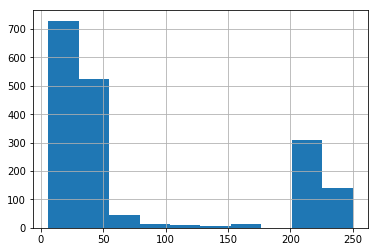

In [18]:
df['dns.qry.name.len'].hist()

In [19]:
df['dns.qry.name.len'].describe()

count    1792.000000
mean       79.494420
std        85.470942
min         6.000000
25%        22.000000
50%        34.000000
75%       205.000000
max       250.000000
Name: dns.qry.name.len, dtype: float64

In [6]:
df[df['dns.qry.name.len'] > 150].sample(20)

,dns.id,ip.src,ip.dst,frame.time_epoch,dns.qry.type,dns.qry.name.len,dns.qry.name,frame.len,dns.resp.ttl,dns.cname,dns.a,dns.aaaa,dns.txt
19,0x00007653,207.126.93.146,187.124.15.148,2017-09-19 10:57:44.612456,16,215,3.1o19sr00nn3osn8qp35q9opqr8844384o877q7s9so7s...,399,"300,300,300",NaN,NaN,NaN,x u i
923,0x000029d8,187.124.15.148,187.124.47.210,2017-09-19 10:57:49.051466,16,241,3.1o19sr00n0r77o53p37483pqr85750r3q977q7s9so7s...,321,300,NaN,NaN,NaN,x c
1324,0x000032c4,207.222.248.126,187.124.15.148,2017-09-19 10:57:51.200321,16,225,3.1o19sr00no41o2oqp3773q1qr8830r606o77q7s9so7s...,289,NaN,NaN,NaN,NaN,NaN
222,0x000028e3,187.124.15.148,187.124.11.159,2017-09-19 10:57:45.692918,16,249,3.1o19sr00n7894739p37477pq1pr155611777q7s9so7s...,329,300,NaN,NaN,NaN,x c
1697,0x00007fd6,187.124.15.148,187.124.53.212,2017-09-19 10:57:54.634909,16,249,3.1o19sr00non31n77p019qo8qr830n2n4n977q7s9so7s...,313,NaN,NaN,NaN,NaN,NaN
709,0x0000159c,187.124.15.148,187.124.55.186,2017-09-19 10:57:47.571988,16,213,3.1o19sr00nn3osn8qp37433pqr83r27p16n77q7s9so7s...,277,NaN,NaN,NaN,NaN,NaN
1702,0x0000ed3c,207.190.89.180,187.124.15.148,2017-09-19 10:57:54.655126,16,223,3.1o19sr00nn3os2r3p375pqpqr8s98ror6477q7s9so7s...,287,NaN,NaN,NaN,NaN,NaN
1774,0x00003295,187.124.15.148,187.124.53.184,2017-09-19 10:57:55.125855,16,215,3.1o19sr00nn3pr072p3703qpqr859286q2377q7s9so7s...,279,NaN,NaN,NaN,NaN,NaN
1310,0x000002fb,187.124.15.148,187.124.55.186,2017-09-19 10:57:51.051059,16,227,3.1o19sr00nn3os2r3p3745qpqr8sp7r166277q7s9so7s...,291,NaN,NaN,NaN,NaN,NaN
1337,0x00005edc,187.124.15.148,187.124.187.212,2017-09-19 10:57:51.234961,16,215,3.1o19sr00n5pq0s95p3745oq0r8s8ooq67q77q7s9so7s...,279,NaN,NaN,NaN,NaN,NaN


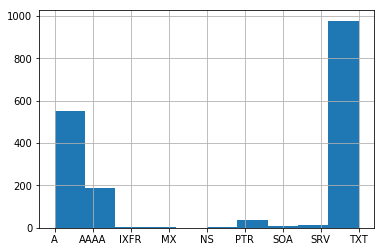

In [21]:
df['dns.qry.type'].hist()

In [27]:
df['dns.qry.type'].value_counts()

TXT     977
A       553
AAAA    187
PTR      39
SRV      13
SOA      10
MX        6
NS        5
IXFR      2
Name: dns.qry.type, dtype: int64

In [29]:
df[df['dns.qry.type'] == 'TXT']

,dns.id,ip.src,ip.dst,frame.time_epoch,dns.qry.type,dns.qry.name.len,dns.qry.name,frame.len,dns.resp.ttl,dns.cname,dns.a,dns.aaaa,dns.txt
0,0x0000e0b8,203.219.233.150,187.124.15.148,2017-09-19 10:57:44.553034,TXT,237,3.1o19sr00no9563s5p356966qr8prq1q8r177q7s9so7s...,301,NaN,NaN,NaN,NaN,NaN
1,0x00003f97,187.124.15.148,187.124.53.184,2017-09-19 10:57:44.553120,TXT,237,3.1o19sr00no9563s5p356966qr8prq1q8r177q7s9so7s...,301,NaN,NaN,NaN,NaN,NaN
2,0x0000afcb,203.182.170.159,187.124.15.148,2017-09-19 10:57:44.556397,TXT,34,36.129.192.54.ip.04.s.sophosxl.net,111,10,NaN,NaN,NaN,NaN
3,0x000067e5,187.124.15.148,187.124.21.255,2017-09-19 10:57:44.556522,TXT,34,36.129.192.54.ip.04.s.sophosxl.net,111,10,NaN,NaN,NaN,NaN
4,0x0000bb53,203.182.170.248,187.124.15.148,2017-09-19 10:57:44.556591,TXT,37,fpevcg.bjacntr.se.m.04.s.sophosxl.net,141,10,NaN,NaN,NaN,w u h 8 0\t#f7a4afdf26fedd16
5,0x00006a5c,187.124.15.148,187.124.21.255,2017-09-19 10:57:44.556722,TXT,37,fpevcg.bjacntr.se.m.04.s.sophosxl.net,141,10,NaN,NaN,NaN,w u h 8 0\t#f7a4afdf26fedd16
9,0x00003065,203.182.164.218,187.124.15.148,2017-09-19 10:57:44.566216,TXT,34,178.40.223.23.ip.04.s.sophosxl.net,111,10,NaN,NaN,NaN,NaN
10,0x0000c04b,187.124.15.148,187.124.21.255,2017-09-19 10:57:44.566340,TXT,34,178.40.223.23.ip.04.s.sophosxl.net,111,10,NaN,NaN,NaN,NaN
11,0x0000ff5c,203.236.188.211,187.124.15.148,2017-09-19 10:57:44.573552,TXT,47,1.uvg-2rkvgv.ybtv4.kvgv.pbz.m.04.s.sophosxl.net,151,10,NaN,NaN,NaN,w u r 8 0\t#57e21a7133dfab6c
12,0x000013eb,187.124.15.148,187.124.21.255,2017-09-19 10:57:44.573693,TXT,47,1.uvg-2rkvgv.ybtv4.kvgv.pbz.m.04.s.sophosxl.net,151,10,NaN,NaN,NaN,w u r 8 0\t#57e21a7133dfab6c
